# Demo

In [1]:
if !(joinpath("..", "src") in LOAD_PATH)
    push!(LOAD_PATH, joinpath("..", "src"));
end

using Spindles
using Plots
using LRSLib #, CDDLib

use data type `Rational{Int}` or `Rational{BigInt}` for exact rational arithmetic

In [2]:
B = Spindles.readrational("s-25-5.txt", BigInt)  # or Int for others
d = ones(Rational{BigInt}, size(B, 1))  # types need to match
s = Spindle(B, d, LRSLib.Library());

change the backend in `Polyhedra`, see [here](https://github.com/JuliaPolyhedra) for available libraries,
e.g. [LRSLib](https://github.com/JuliaPolyhedra/LRSLib.jl) or [CDDLib](https://github.com/JuliaPolyhedra/CDDLib.jl).

```
    using LRSLib
    s = Spindle(B, d, LRSLib.Library());
```

Note that when using `CDDLib`, the `:exact` flag is important to tell the library to use rational arithmetic:
```
    using CDDLib
    s = Spindle(B, d, CDDLib.Library(:exact));
```

In [3]:
eltype(B)

Rational{BigInt}

Check whether indeed a spindle: (can even prescribe one apex)

In [4]:
apices(s)

2-element Vector{Int64}:
  1
 73

In [5]:
eltype(s.B), eltype(collect(vertices(s))[1])

(Rational{BigInt}, Rational{BigInt})

In [6]:
collect(vertices(s))[apices(s)]

2-element Vector{Vector{Rational{BigInt}}}:
 [-1//1, 0//1, 0//1, 0//1, 0//1]
 [1//1, 0//1, 0//1, 0//1, 0//1]

Next identify good 2-faces of `s`. We first enumerate all 2-faces with the function `facesofdim`.

In [7]:
fs = facesofdim(s, 2)
println("Found $(length(fs)) 2-faces.")

length(pairs) = 569
(length(nondegenerate_pairs), length(degenerate_pairs)) = (569, 0)
Found 569 2-faces.


Now for each of them, check whether it is good and collect them in a list `goodfaces`

`isgood2face` not only returns true/false but witnessing edges and vertices, combined in type FaceState

In [8]:
goodfaces = []
for f in fs
    # not only returns true/false but witnessing edges and vertices, combined in type FaceState
    fstate = isgood2face(s, f)
    if fstate.good
        push!(goodfaces, fstate)
    end
end

println("Found $(length(goodfaces)) good 2-faces ($(length(fs)) in total).")

Found 32 good 2-faces (569 in total).


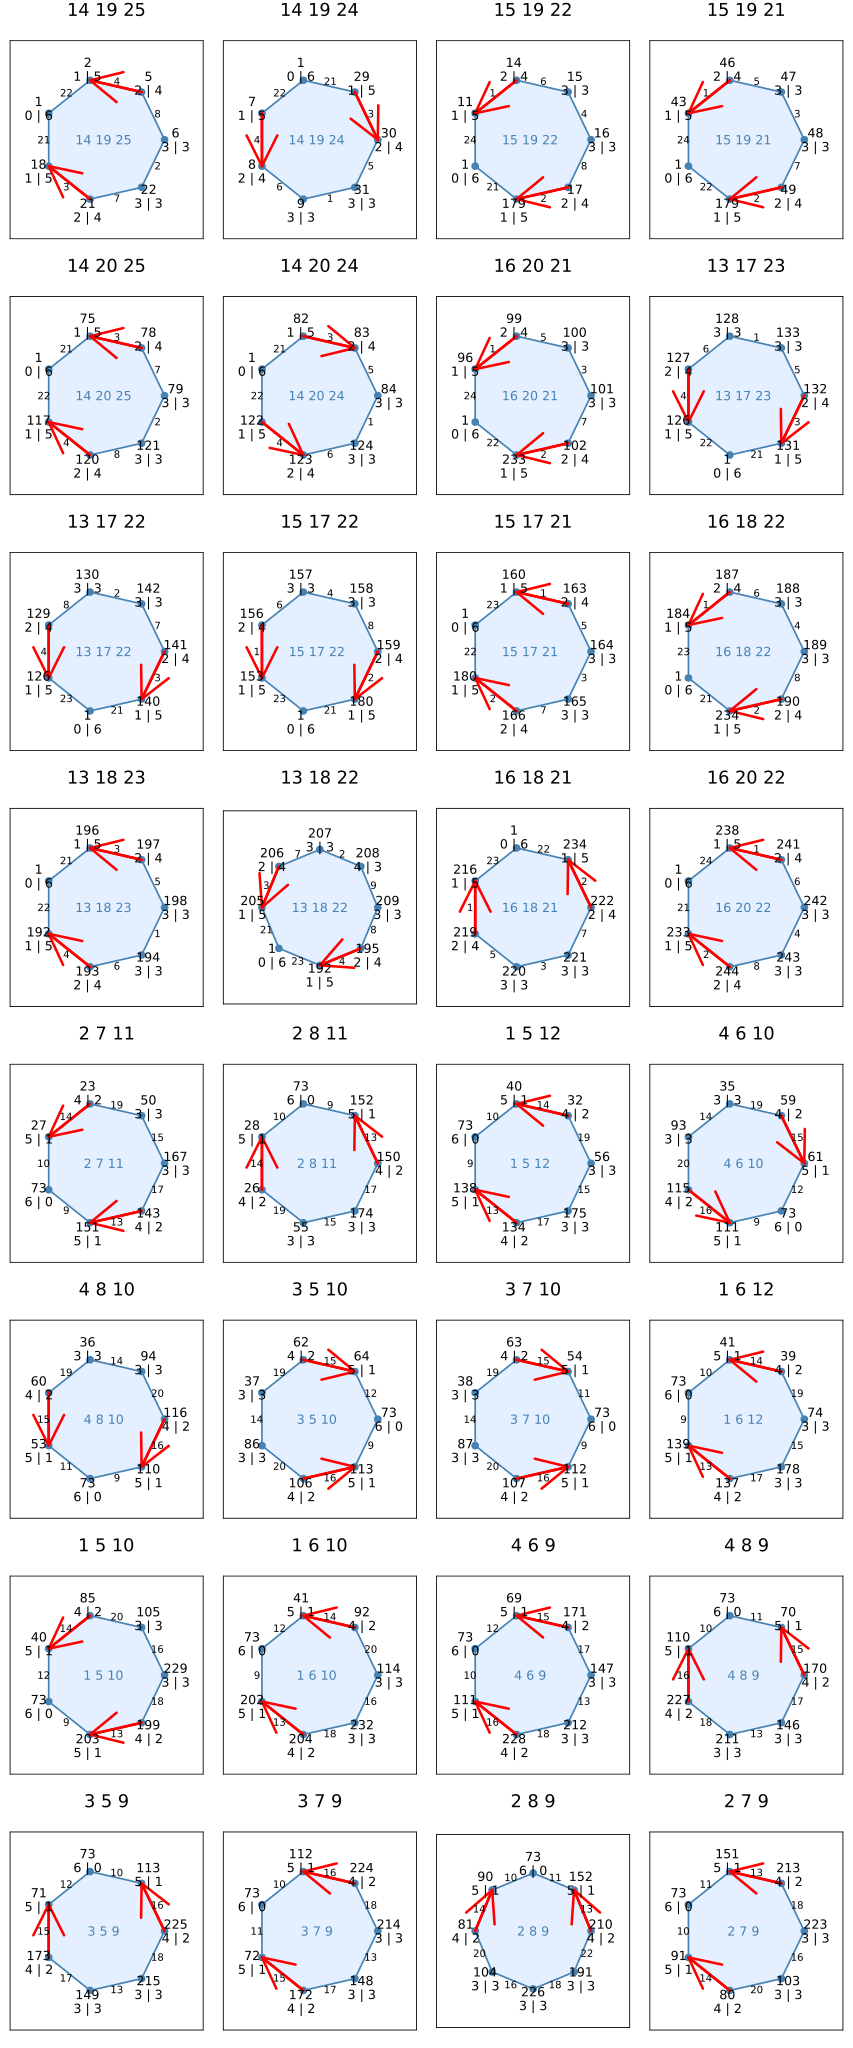

In [9]:
plot_arr = []
for fstate in goodfaces
    push!(plot_arr, plot2face(s, fstate.facets, usecoordinates=false, edgepair=fstate.edges))
end

ncols = 4
nrows = ceil(Int, length(plot_arr) / ncols)
plot(plot_arr..., layout=(nrows,ncols), size=(1000,nrows*300))  # TODO add bottom_margin = 10px

In [10]:
#savefig("goodfaces.pdf")